In [137]:
import csv
import matplotlib.pyplot as plt
import statistics

In [138]:
import csv
import matplotlib.pyplot as plt
import statistics

In [139]:
population_size = 40
number_of_games = 200000
generations_number = 100

stats_dir = f'Plots/stats/{population_size}_{number_of_games}_{generations_number}'
score_dir = f'Plots/score'

In [140]:
def get_stats(generation):    
    stats = []
    for i in range (1, population_size + 1):
        csv_file = f'{stats_dir}/{i}_{generation}.csv'
        with open(csv_file, 'r') as file:
            dict_reader = csv.DictReader(file)
            string_stats = list(dict_reader)
        int_stats = []
        for stat in string_stats:
            int_stats.append({k:float(v) for k, v in stat.items()})
        stats.append(int_stats)
    return stats

In [141]:
def fitness_score_variability(stats):
    score_by_games = []
    for i in range(0, len(stats[0])):
        score_by_games.append([])
        for j in range(0, population_size):
            score_by_games[i].append(stats[j][i]['score'])
    static_dev = []
    for i in range(0, len(score_by_games)):
        static_dev.append(statistics.stdev(score_by_games[i]))
    return static_dev

<function matplotlib.pyplot.show(close=None, block=None)>

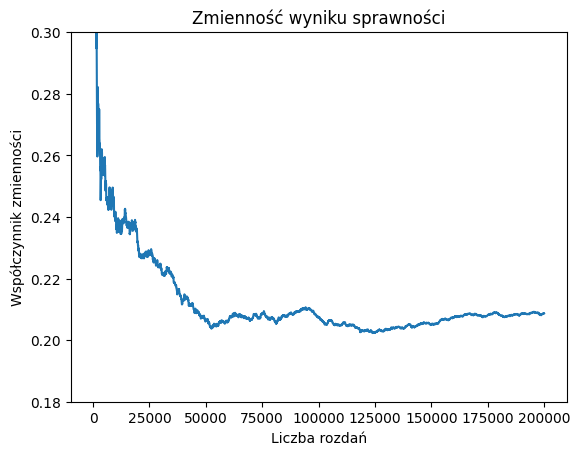

In [142]:
stats = get_stats(generations_number)
static_dev = fitness_score_variability(stats)

x = []
y = []
for i in range (0, len(static_dev)):
    x.append(stats[0][i]['games'])
    y.append(static_dev[i] / stats[0][i]['games'])
plt.plot(x,y)
plt.title("Zmienność wyniku sprawności")
plt.xlabel("Liczba rozdań")
plt.ylabel("Współczynnik zmienności")
plt.ylim(0.18, 0.3)
plt.show   

In [154]:
def get_scores(population, number_of_games, number_of_generations, selection):
    scores = []
    txt_file = f'{score_dir}/{population}_{number_of_games}_{number_of_generations}_{selection}.txt'
    with open(txt_file) as file:
        for line in file.readlines():
            scores.append(int(line))
    return scores

<function matplotlib.pyplot.show(close=None, block=None)>

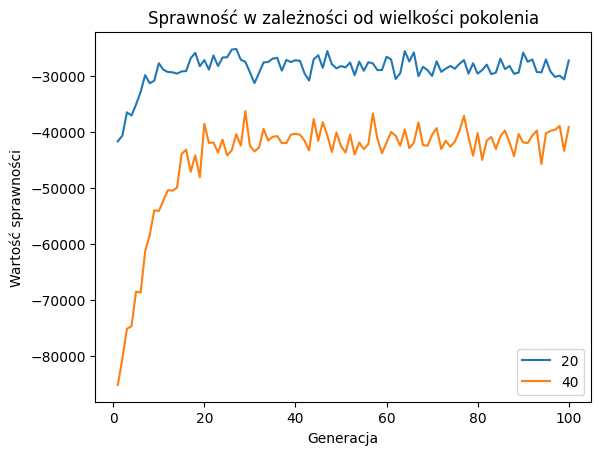

In [157]:
pop1 = 20
pop2 = 40

games = 1000
generations_number = 100
selection = 7

x = []
for i in range(generations_number):
    x.append(i+1)
    
y = []
y.append(get_scores(pop1, games, generations_number, selection))
y.append(get_scores(pop2, games, generations_number, selection))

plt.plot(x,y[0], label = pop1)
plt.plot(x,y[1], label = pop2)
plt.title("Sprawność w zależności od wielkości pokolenia")
plt.xlabel("Generacja")
plt.ylabel("Wartość sprawności")
plt.legend()
plt.show   

<function matplotlib.pyplot.show(close=None, block=None)>

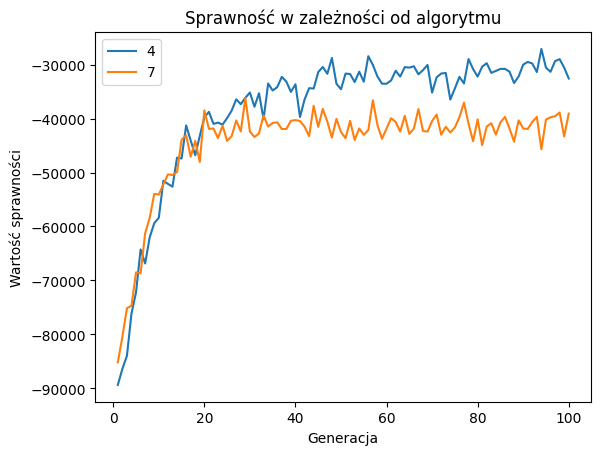

In [158]:
population = 40
games = 1000
generations_number = 100

selec1 = 4
selec2 = 7

x = []
for i in range(generations_number):
    x.append(i+1)
    
y = []
y.append(get_scores(population, games, generations_number, selec1))
y.append(get_scores(population, games, generations_number, selec2))

plt.plot(x,y[0], label = selec1)
plt.plot(x,y[1], label = selec2)
plt.title("Sprawność w zależności od algorytmu")
plt.xlabel("Generacja")
plt.ylabel("Wartość sprawności")
plt.legend()
plt.show   

In [159]:
population_size = 40
number_of_games = 200000
generations_number = 100

stats_dir = f'Plots/stats/{population_size}_{number_of_games}_{generations_number}'

In [162]:
csv_filename = f'{stats_dir}/{population_size}_{generations_number}.csv'
with open(csv_filename, 'r') as file:
    dict_reader = csv.DictReader(file)
    string_stats = list(dict_reader)
stats = []
for stat in string_stats:
    stats.append({k:float(v) for k, v in stat.items()})

<function matplotlib.pyplot.show(close=None, block=None)>

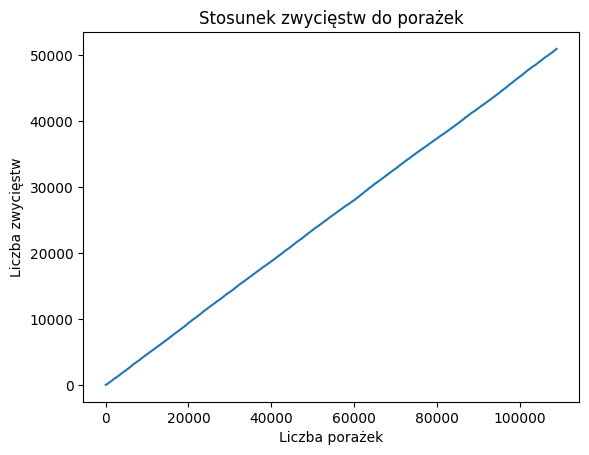

In [163]:
x = []
y = []
for stat in stats:
    x.append(stat['loses'])
    y.append(stat['wins'])
plt.plot(x,y)
plt.title("Stosunek zwycięstw do porażek")
plt.xlabel("Liczba porażek")
plt.ylabel("Liczba zwycięstw")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

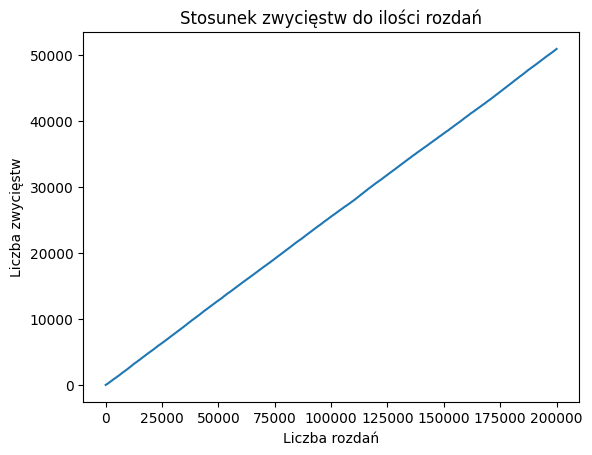

In [164]:
x = []
y = []
for stat in stats:
    x.append(stat['games'])
    y.append(stat['wins'])
plt.plot(x,y)
plt.title("Stosunek zwycięstw do ilości rozdań")
plt.xlabel("Liczba rozdań")
plt.ylabel("Liczba zwycięstw")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

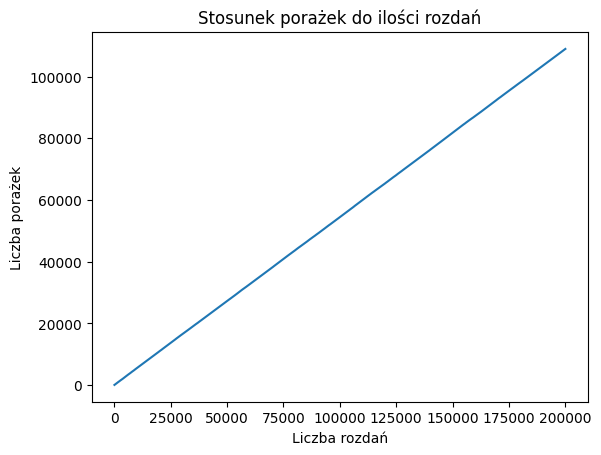

In [165]:
x = []
y = []
for stat in stats:
    x.append(stat['games'])
    y.append(stat['loses'])
plt.plot(x,y)
plt.title("Stosunek porażek do ilości rozdań")
plt.xlabel("Liczba rozdań")
plt.ylabel("Liczba porażek")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

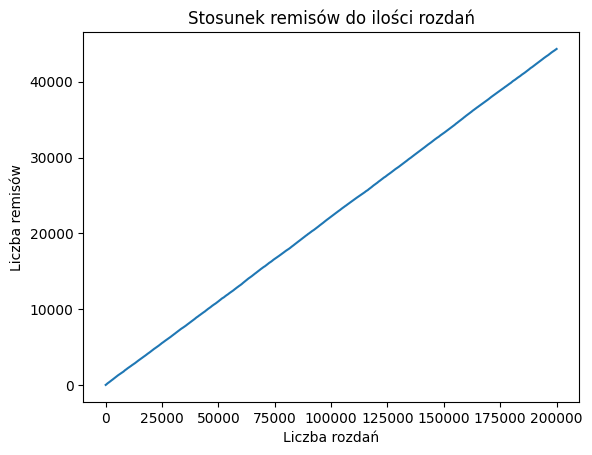

In [166]:
x = []
y = []
for stat in stats:
    x.append(stat['games'])
    y.append(stat['draws'])
plt.plot(x,y)
plt.title("Stosunek remisów do ilości rozdań")
plt.xlabel("Liczba rozdań")
plt.ylabel("Liczba remisów")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

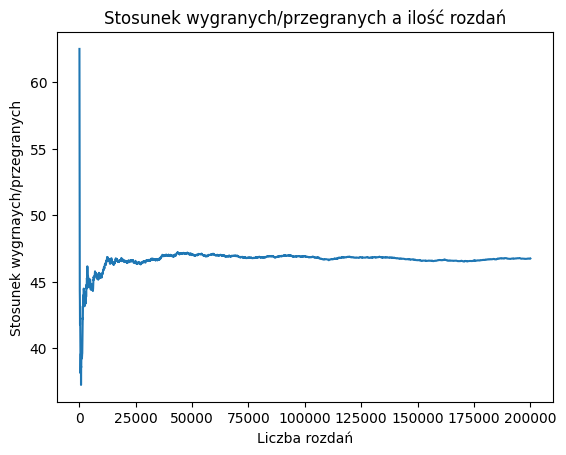

In [167]:
x = []
y = []
for stat in stats:
    x.append(stat['games'])
    y.append(stat['wins']/stat['loses']*100)
plt.plot(x,y)
plt.title("Stosunek wygranych/przegranych a ilość rozdań")
plt.xlabel("Liczba rozdań")
plt.ylabel("Stosunek wygrnaych/przegranych")
plt.show